<a href="https://colab.research.google.com/github/miguel-duque06/Analise_exploratoria-EDA/blob/main/Analise__exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória para uma empresa de chocolate:

![Chocolate](https://i.ytimg.com/vi/301nEGzgW10/maxresdefault.jpg)

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
url = '/content/Chocolate_Sales.csv'

In [161]:
dados_nulos = pd.read_csv(url)

In [162]:
dados_chocolate = dados_nulos.dropna()

#A empresa quer dar um prêmio para o maior vendedor deles
Objetivo: Identificar o vendedor com maior performance comercial através da análise do dataset Chocolate_Sales.csv contendo informações de Sales Person, Country, Product, Date, Amount e Boxes Shipped.





![Vendedor](https://lh3.googleusercontent.com/gg/AMW1TPq_Q4nW7-EkrogazReaaGWGotZBb7F8uA7nA69bat8M6_3RfyHt8_ejHMjjz-8oqGBd7PVLkDbnE1UFpFCq0aYojLTxH4NcdaPZxnypLnqCydbTUxTfC6XISf6XXSYvll6w85RycPu6NMj2gah6GmYUk8nz-Pr9LSh09-SabWoNsRq4oig=s1024-rj-mp2)

Limpando os dados da coluna "Amount" e tornando-os em float

In [163]:
dados_chocolate['Amount'] = (
    dados_chocolate['Amount']
    .astype(str)
    .str.replace('[$]', '', regex=True)     # Remove $
    .str.replace(',', '', regex=False)       # Remove vírgulas milhar
    .astype(float)                          # Python lê os numeros depois do . como decimal
)

Calculo das vendas por vendedor

In [164]:
faturamento_vendedor = dados_chocolate.groupby('Sales Person').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).round(2).sort_values('Amount', ascending=False)



In [165]:
faturamento_vendedor

,Amount,Boxes Shipped
Sales Person,,
Ches Bonnell,1022599.96,23070
Oby Sorrel,1017204.12,26390
Madelene Upcott,1010028.72,22199
Kelci Walkden,1002929.10,26605
Brien Boise,997326.48,24738
Van Tuxwell,974425.09,20627
Dennison Crosswaite,931849.57,26862
Beverie Moffet,892421.37,28027
Kaine Padly,849062.76,22134


#Gráfico do faturamento por vendedor

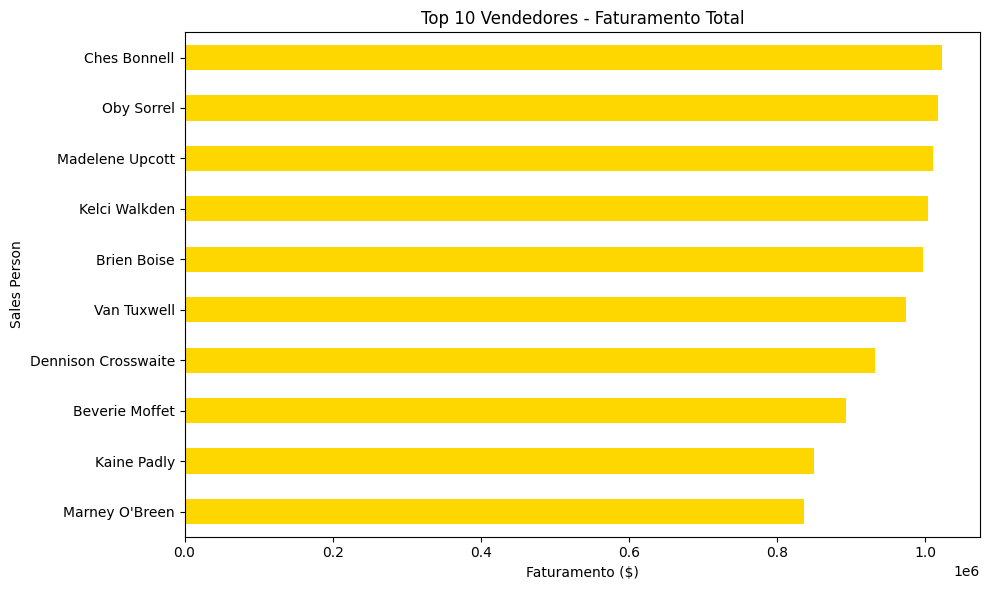

In [166]:
faturamento_top = faturamento_vendedor['Amount'].nlargest(10).sort_values(ascending=True)

faturamento_top.plot(kind='barh', figsize=(10,6), color='gold')
plt.title('Top 10 Vendedores - Faturamento Total')
plt.xlabel('Faturamento ($)')
plt.tight_layout()
plt.show()

#A empresa está precisando deixar de vender um produto para diminuir os gastos
Objetivo: Identificar por meio de um gráfico qual produto está sendo menos vendido.

![Vendas caindo](https://img.freepik.com/fotos-premium/conceito-de-falencia-com-corrente-caindo-como-um-jogo-de-domino-e-diminuindo_207634-675.jpg?semt=ais_hybrid&w=740&q=80)

In [167]:
frequencia_produtos = dados_chocolate['Product'].value_counts().sort_values(ascending=False)

In [168]:
frequencia_produtos

,count
Product,
Eclairs,180
50% Dark Bites,180
Smooth Sliky Salty,177
White Choc,174
Drinking Coco,168
Spicy Special Slims,162
Organic Choco Syrup,156
85% Dark Bars,150
Fruit & Nut Bars,150


#Gráfico dos produtos vendidos

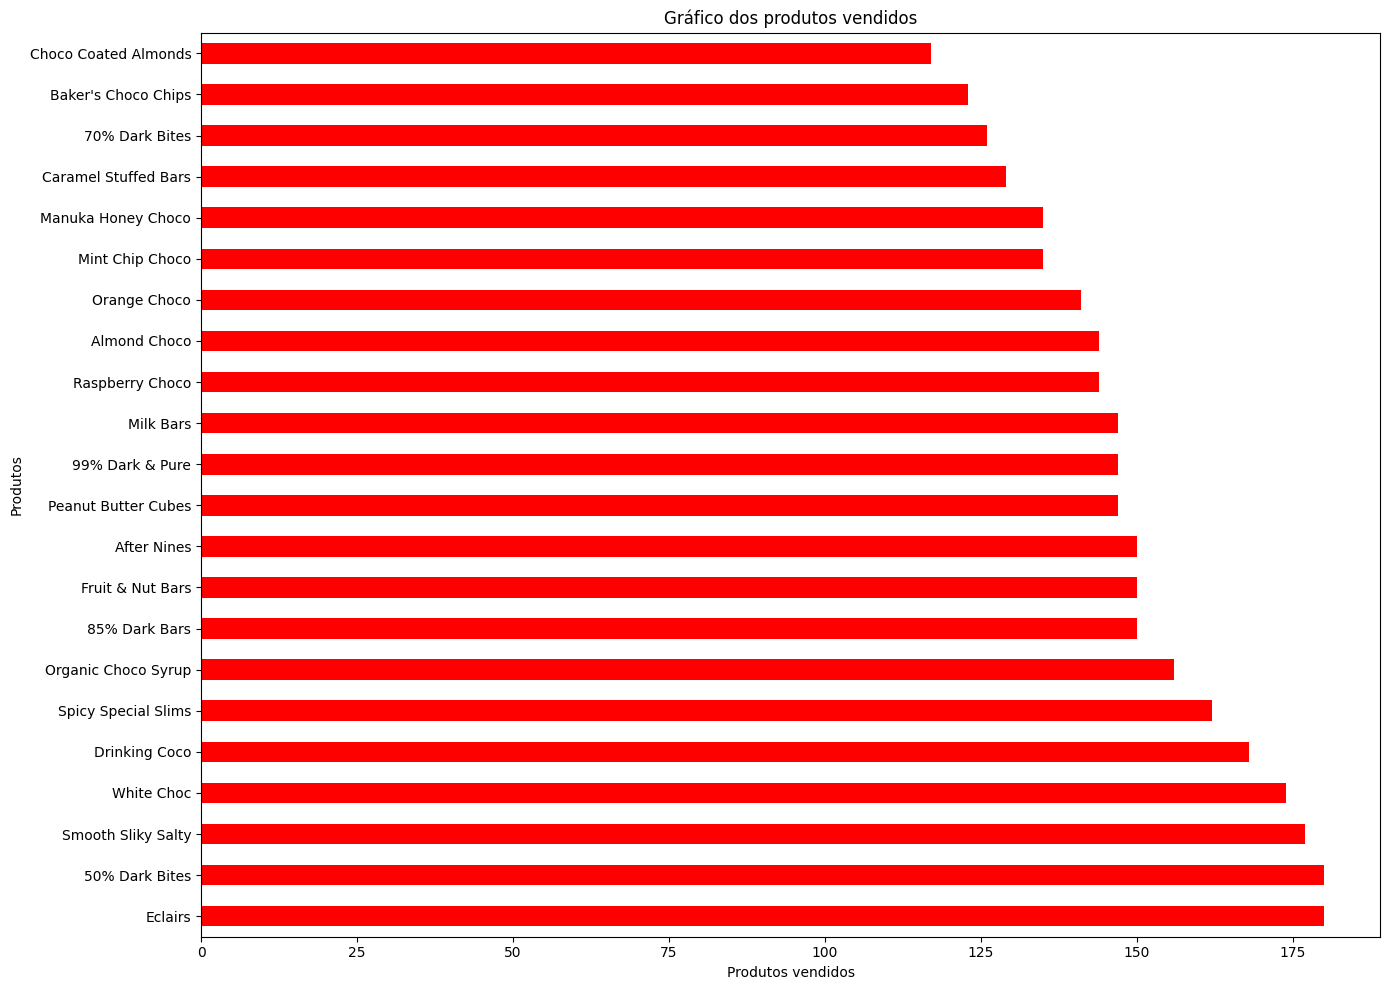

In [169]:
frequencia_produtos.plot(kind='barh', figsize=(14,10), color='red')
plt.title('Gráfico dos produtos vendidos')
plt.xlabel('Produtos vendidos')
plt.ylabel('Produtos')
plt.tight_layout()
plt.show()

![Vendas mundo](https://lh3.googleusercontent.com/gg/AMW1TPqQQWaYpbRDkPp2E66m_C_zw11k9sZeKWnHDXV5n13FD-ZL1vsyp0bPHSwas1U59nw2wx6UN8_cjbSr2uANsLYrzLhBCL27jmoG7itIKP7b7gt9iWXvN7qgRDjOgVBaJGblkkJ3EW686Wy_dwP7XFdOlpQSDbpKBSlH9LFxxsj09cFteay4=s1024-rj-mp2)

#Qual país recebe mais pedidos?

In [170]:
faturamento_pais = dados_chocolate['Country'].value_counts().sort_values()

In [171]:
faturamento_pais

,count
Country,
New Zealand,519
Canada,525
UK,534
USA,537
India,552
Australia,615


#Gráfico dos paises com mais pedidos

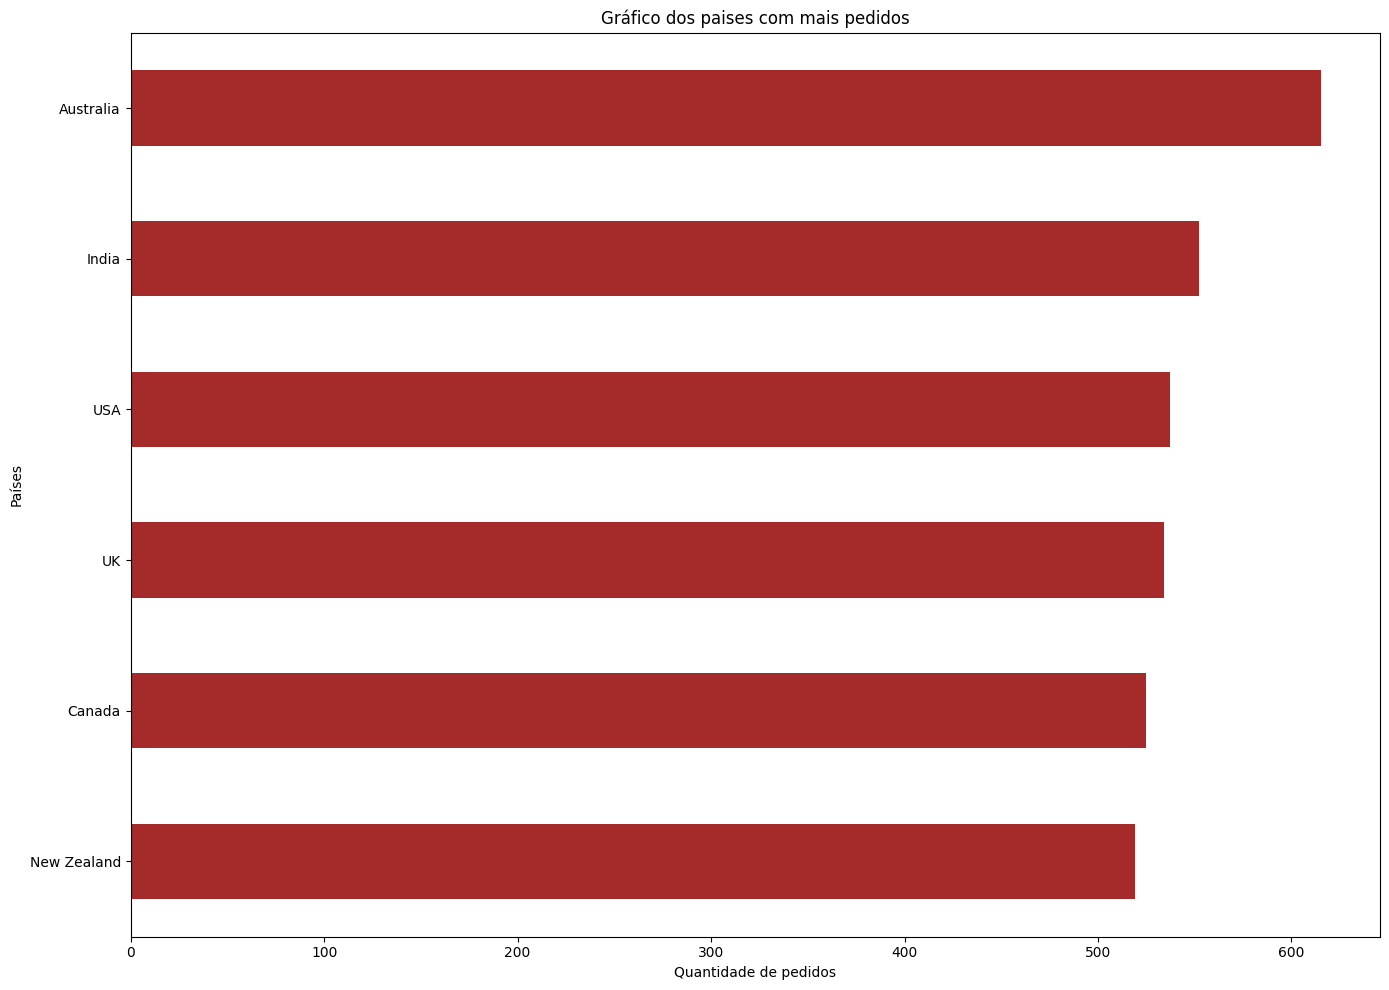

In [172]:
faturamento_pais.plot(kind='barh', figsize=(14,10), color='brown')
plt.title('Gráfico dos paises com mais pedidos')
plt.xlabel('Quantidade de pedidos')
plt.ylabel('Países')
plt.tight_layout()
plt.show()

#A empresa quer enteder qual mês eles devem aumentar a produção de chocolates
Objetivo: Identificar em qual mês a empresa vende mais.

![Mais vendas](https://abisa.com.br/site/wp-content/uploads/Grafico-de-colunas-aumento-vendas.jpg)

Convertendo Date para datetime

In [173]:
dados_chocolate['Date'] = pd.to_datetime(dados_chocolate['Date'], format='%d/%m/%Y')

Extraindo MÊS

In [174]:
dados_chocolate['Mes'] = dados_chocolate['Date'].dt.month

Calculando dados

In [175]:
vendas_por_mes = dados_chocolate.groupby('Mes')['Amount'].sum()

In [176]:
vendas_por_mes

,Amount
Mes,
1,2868712.59
2,2232096.90
3,2404769.29
4,2161927.22
5,2415750.57
6,2773931.94
7,2567532.29
8,2366851.06


#Gráfico das vendas em cada mês

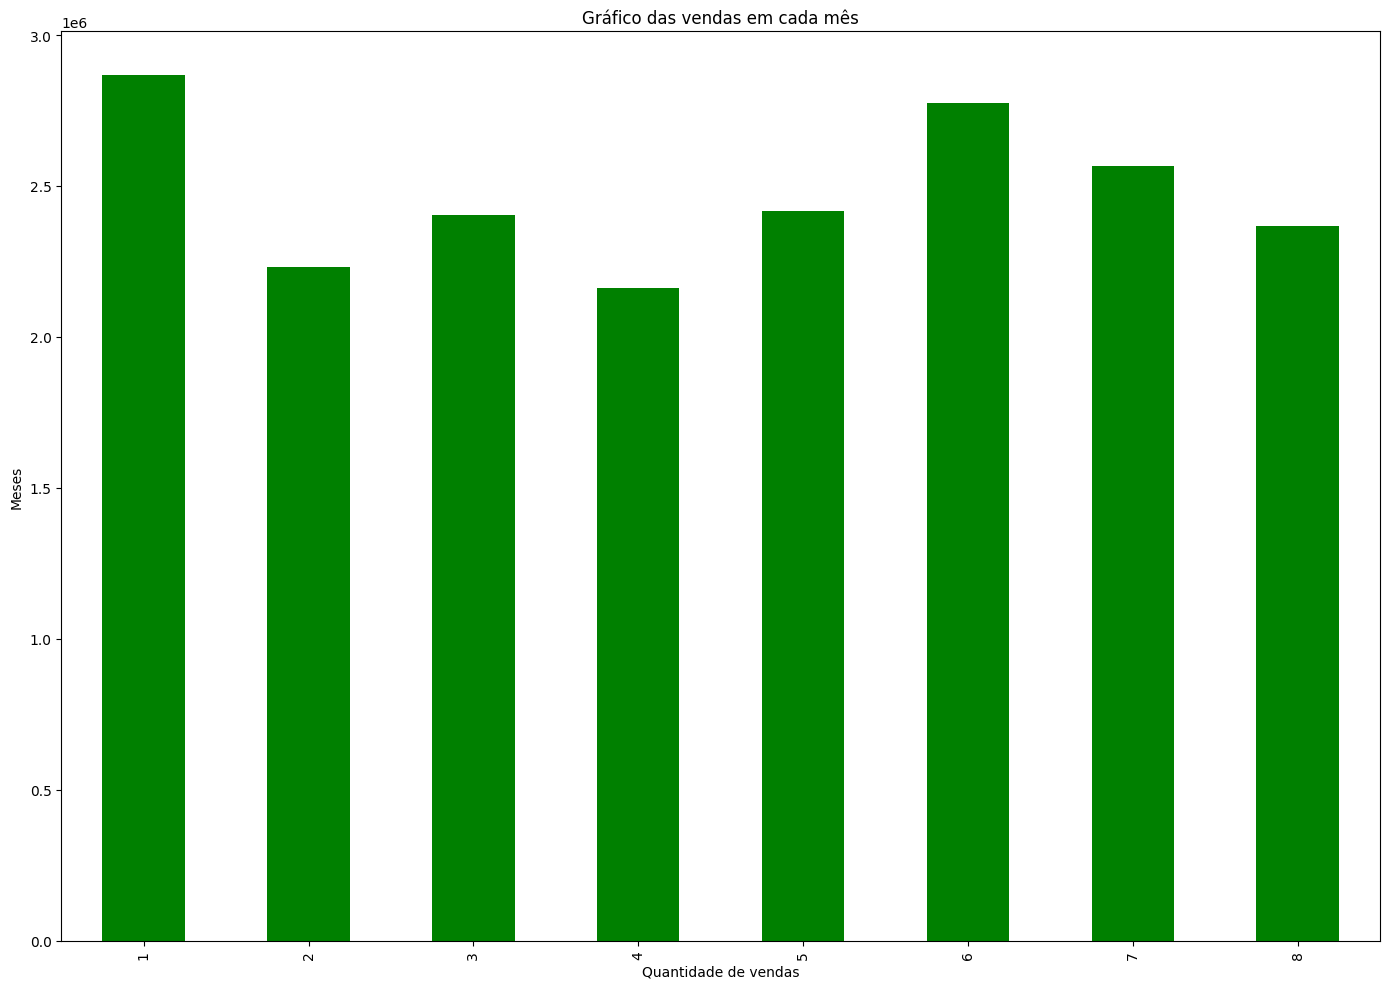

In [177]:
vendas_por_mes.plot(kind='bar', figsize=(14,10), color='green')
plt.title('Gráfico das vendas em cada mês')
plt.xlabel('Quantidade de vendas')
plt.ylabel('Meses')
plt.tight_layout()
plt.show()